In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
pd.set_option('display.max_columns', 500)
import sys, os
from sklearn.linear_model import LogisticRegression
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
from derm7pt.dataset import Derm7PtDataset, Derm7PtDatasetGroupInfrequent
from derm7pt.vis import plot_confusion
from derm7pt.kerasutils import deep_features

In [9]:
# CHANGE THIS LINE TO YOUR DATA DIRECTORY.
dir_release = "D:/COLLEGE/PROJECTS/(incomplete) 7 point checklist/derm7pt/release_v0"
dir_meta = os.path.join(dir_release, 'meta')
dir_images = os.path.join(dir_release, 'images')

In [10]:
meta_df = pd.read_csv(os.path.join(dir_meta, 'meta.csv'))
train_indexes = list(pd.read_csv(os.path.join(dir_meta, 'train_indexes.csv'))['indexes'])
valid_indexes = list(pd.read_csv(os.path.join(dir_meta, 'valid_indexes.csv'))['indexes'])
test_indexes = list(pd.read_csv(os.path.join(dir_meta, 'test_indexes.csv'))['indexes'])

In [11]:
print(len(train_indexes), len(valid_indexes), len(test_indexes))

413 203 395


In [12]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   case_num                        1011 non-null   int64 
 1   diagnosis                       1011 non-null   object
 2   seven_point_score               1011 non-null   int64 
 3   pigment_network                 1011 non-null   object
 4   streaks                         1011 non-null   object
 5   pigmentation                    1011 non-null   object
 6   regression_structures           1011 non-null   object
 7   dots_and_globules               1011 non-null   object
 8   blue_whitish_veil               1011 non-null   object
 9   vascular_structures             1011 non-null   object
 10  level_of_diagnostic_difficulty  1011 non-null   object
 11  elevation                       1011 non-null   object
 12  location                        1011 non-null   

In [13]:
meta_df.drop(axis = 1, columns = ['case_id', 'notes'], inplace = True)
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   case_num                        1011 non-null   int64 
 1   diagnosis                       1011 non-null   object
 2   seven_point_score               1011 non-null   int64 
 3   pigment_network                 1011 non-null   object
 4   streaks                         1011 non-null   object
 5   pigmentation                    1011 non-null   object
 6   regression_structures           1011 non-null   object
 7   dots_and_globules               1011 non-null   object
 8   blue_whitish_veil               1011 non-null   object
 9   vascular_structures             1011 non-null   object
 10  level_of_diagnostic_difficulty  1011 non-null   object
 11  elevation                       1011 non-null   object
 12  location                        1011 non-null   

In [14]:
meta_df.head()

case_num             diagnosis  seven_point_score pigment_network streaks  \
0         1  basal cell carcinoma                  0          absent  absent   
1         2  basal cell carcinoma                  1          absent  absent   
2         3  basal cell carcinoma                  1          absent  absent   
3         4  basal cell carcinoma                  4          absent  absent   
4         5  basal cell carcinoma                  1          absent  absent   

        pigmentation regression_structures dots_and_globules  \
0             absent                absent            absent   
1             absent                absent         irregular   
2             absent                absent         irregular   
3             absent            blue areas         irregular   
4  diffuse irregular                absent            absent   

  blue_whitish_veil vascular_structures level_of_diagnostic_difficulty  \
0            absent          arborizing                         medium   
1            absent              absent                            low   
2            absent          arborizing                         medium   
3           present   within regression                            low   
4            absent              absent                           high   

  elevation     location     sex management          clinic            derm  
0   nodular      abdomen  female   excision  NEL/NEL025.JPG  NEL/Nel026.jpg  
1  palpable    head neck  female   excision  NEL/NEL027.JPG  NEL/Nel028.jpg  
2  palpable    head neck  female   excision  NEL/Nel032.jpg  NEL/Nel033.jpg  
3  palpable  lower limbs    male   excision  NEL/NEL034.JPG  NEL/Nel035.jpg  
4  palpable  upper limbs  female   excision  NEL/NEL036.JPG  NEL/Nel037.jpg

In [15]:
meta_df.iloc[test_indexes].shape

(395, 17)

In [16]:
meta_df.derm = dir_images+'/'+meta_df.derm
meta_df.clinic = dir_images+'/'+meta_df.clinic

(-0.5, 767.5, 511.5, -0.5)

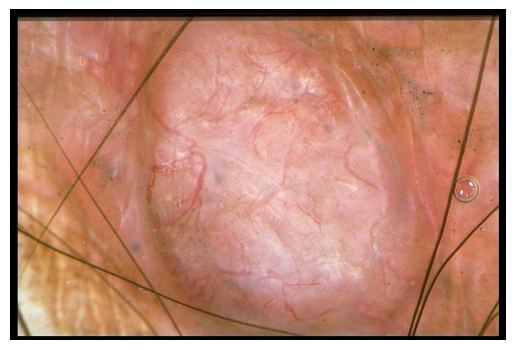

In [17]:
img = plt.imread(meta_df.derm.loc[0])
plt.imshow(img)
plt.axis('off')

In [18]:
img.dtype

dtype('uint8')

In [19]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   case_num                        1011 non-null   int64 
 1   diagnosis                       1011 non-null   object
 2   seven_point_score               1011 non-null   int64 
 3   pigment_network                 1011 non-null   object
 4   streaks                         1011 non-null   object
 5   pigmentation                    1011 non-null   object
 6   regression_structures           1011 non-null   object
 7   dots_and_globules               1011 non-null   object
 8   blue_whitish_veil               1011 non-null   object
 9   vascular_structures             1011 non-null   object
 10  level_of_diagnostic_difficulty  1011 non-null   object
 11  elevation                       1011 non-null   object
 12  location                        1011 non-null   

In [20]:
meta_df.management

0                     excision
1                     excision
2                     excision
3                     excision
4                     excision
                 ...          
1006    no further examination
1007                  excision
1008        clinical follow up
1009    no further examination
1010                  excision
Name: management, Length: 1011, dtype: object

In [21]:
meta_df.drop(axis = 1, columns = 'management', inplace = True)
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   case_num                        1011 non-null   int64 
 1   diagnosis                       1011 non-null   object
 2   seven_point_score               1011 non-null   int64 
 3   pigment_network                 1011 non-null   object
 4   streaks                         1011 non-null   object
 5   pigmentation                    1011 non-null   object
 6   regression_structures           1011 non-null   object
 7   dots_and_globules               1011 non-null   object
 8   blue_whitish_veil               1011 non-null   object
 9   vascular_structures             1011 non-null   object
 10  level_of_diagnostic_difficulty  1011 non-null   object
 11  elevation                       1011 non-null   object
 12  location                        1011 non-null   

In [34]:
img_df = meta_df[['derm', 'diagnosis']]

In [24]:
list(meta_df.diagnosis.unique())

['basal cell carcinoma',
 'blue nevus',
 'clark nevus',
 'combined nevus',
 'congenital nevus',
 'dermal nevus',
 'dermatofibroma',
 'lentigo',
 'melanoma (in situ)',
 'melanoma (less than 0.76 mm)',
 'melanoma (0.76 to 1.5 mm)',
 'melanoma (more than 1.5 mm)',
 'melanoma metastasis',
 'melanosis',
 'miscellaneous',
 'recurrent nevus',
 'reed or spitz nevus',
 'seborrheic keratosis',
 'vascular lesion',
 'melanoma']

In [25]:
idx_to_class = {0: 'basal cell carcinoma',
 1: 'blue nevus',
 2: 'clark nevus',
 3: 'combined nevus',
 4: 'congenital nevus',
 5: 'dermal nevus',
 6: 'dermatofibroma',
 7: 'lentigo',
 8: ['melanoma',
  'melanoma (in situ)',
  'melanoma (less than 0.76 mm)',
  'melanoma (0.76 to 1.5 mm)',
  'melanoma (more than 1.5 mm)',
  'melanoma metastasis'],
 9: 'melanosis',
 10: 'miscellaneous',
 11: 'recurrent nevus',
 12: 'reed or spitz nevus',
 13: 'seborrheic keratosis',
 14: 'vascular lesion'}

In [26]:
idx_to_class

{0: 'basal cell carcinoma',
 1: 'blue nevus',
 2: 'clark nevus',
 3: 'combined nevus',
 4: 'congenital nevus',
 5: 'dermal nevus',
 6: 'dermatofibroma',
 7: 'lentigo',
 8: ['melanoma',
  'melanoma (in situ)',
  'melanoma (less than 0.76 mm)',
  'melanoma (0.76 to 1.5 mm)',
  'melanoma (more than 1.5 mm)',
  'melanoma metastasis'],
 9: 'melanosis',
 10: 'miscellaneous',
 11: 'recurrent nevus',
 12: 'reed or spitz nevus',
 13: 'seborrheic keratosis',
 14: 'vascular lesion'}

In [27]:
class_to_idx = dict()
for key, value in idx_to_class.items():
    if isinstance(value, list):
        for i in value:
            class_to_idx[i] = key
    else:
        class_to_idx[value] = key

class_to_idx  

{'basal cell carcinoma': 0,
 'blue nevus': 1,
 'clark nevus': 2,
 'combined nevus': 3,
 'congenital nevus': 4,
 'dermal nevus': 5,
 'dermatofibroma': 6,
 'lentigo': 7,
 'melanoma': 8,
 'melanoma (in situ)': 8,
 'melanoma (less than 0.76 mm)': 8,
 'melanoma (0.76 to 1.5 mm)': 8,
 'melanoma (more than 1.5 mm)': 8,
 'melanoma metastasis': 8,
 'melanosis': 9,
 'miscellaneous': 10,
 'recurrent nevus': 11,
 'reed or spitz nevus': 12,
 'seborrheic keratosis': 13,
 'vascular lesion': 14}

In [29]:

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13714886237070555820
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2365063168
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6784533596581722291
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1650 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [74]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [30]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

import os

In [43]:
img_df['image'] = img_df['derm'].apply(lambda x : cv2.imread(x))

C:\Users\abhay\AppData\Local\Temp\ipykernel_30312\935299542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  img_df['image'] = img_df['derm'].apply(lambda x : cv2.imread(x))


In [46]:
img_df['image'] = img_df['image'].apply(lambda x : cv2.resize(x, (150, 150)))

C:\Users\abhay\AppData\Local\Temp\ipykernel_30312\3117804498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  img_df['image'] = img_df['image'].apply(lambda x : cv2.resize(x, (150, 150)))


In [64]:
images = img_df.image.tolist()

In [68]:
images = np.array(images)
images.shape

(1011, 150, 150, 3)

In [85]:
img_df['label'] = img_df['diagnosis'].apply(lambda x : class_to_idx[x])

C:\Users\abhay\AppData\Local\Temp\ipykernel_30312\1998763209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  img_df['label'] = img_df['diagnosis'].apply(lambda x : class_to_idx[x])


In [86]:
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   derm       1011 non-null   object
 1   diagnosis  1011 non-null   object
 2   image      1011 non-null   object
 3   label      1011 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 31.7+ KB


In [87]:
train_img_df = img_df.iloc[train_indexes][['image', 'label']].reset_index(drop = True)
valid_img_df = img_df.iloc[valid_indexes][['image', 'label']].reset_index(drop = True)
test_img_df = img_df.iloc[test_indexes][['image', 'label']].reset_index(drop = True)


In [89]:
train_x = train_img_df.image.tolist()
valid_x = valid_img_df.image.tolist()
test_x = test_img_df.image.tolist()
train_x = np.array(train_x)
valid_x = np.array(valid_x)
test_x = np.array(test_x)

In [90]:
train_x.shape, valid_x.shape, test_x.shape

((413, 150, 150, 3), (203, 150, 150, 3), (395, 150, 150, 3))

In [91]:
train_y = train_img_df.label.tolist()
valid_y = valid_img_df.label.tolist()
test_y = test_img_df.label.tolist()
train_y = np.array(train_y)
valid_y = np.array(valid_y)
test_y = np.array(test_y)

In [92]:
train_y.shape, valid_y.shape, test_y.shape

((413,), (203,), (395,))

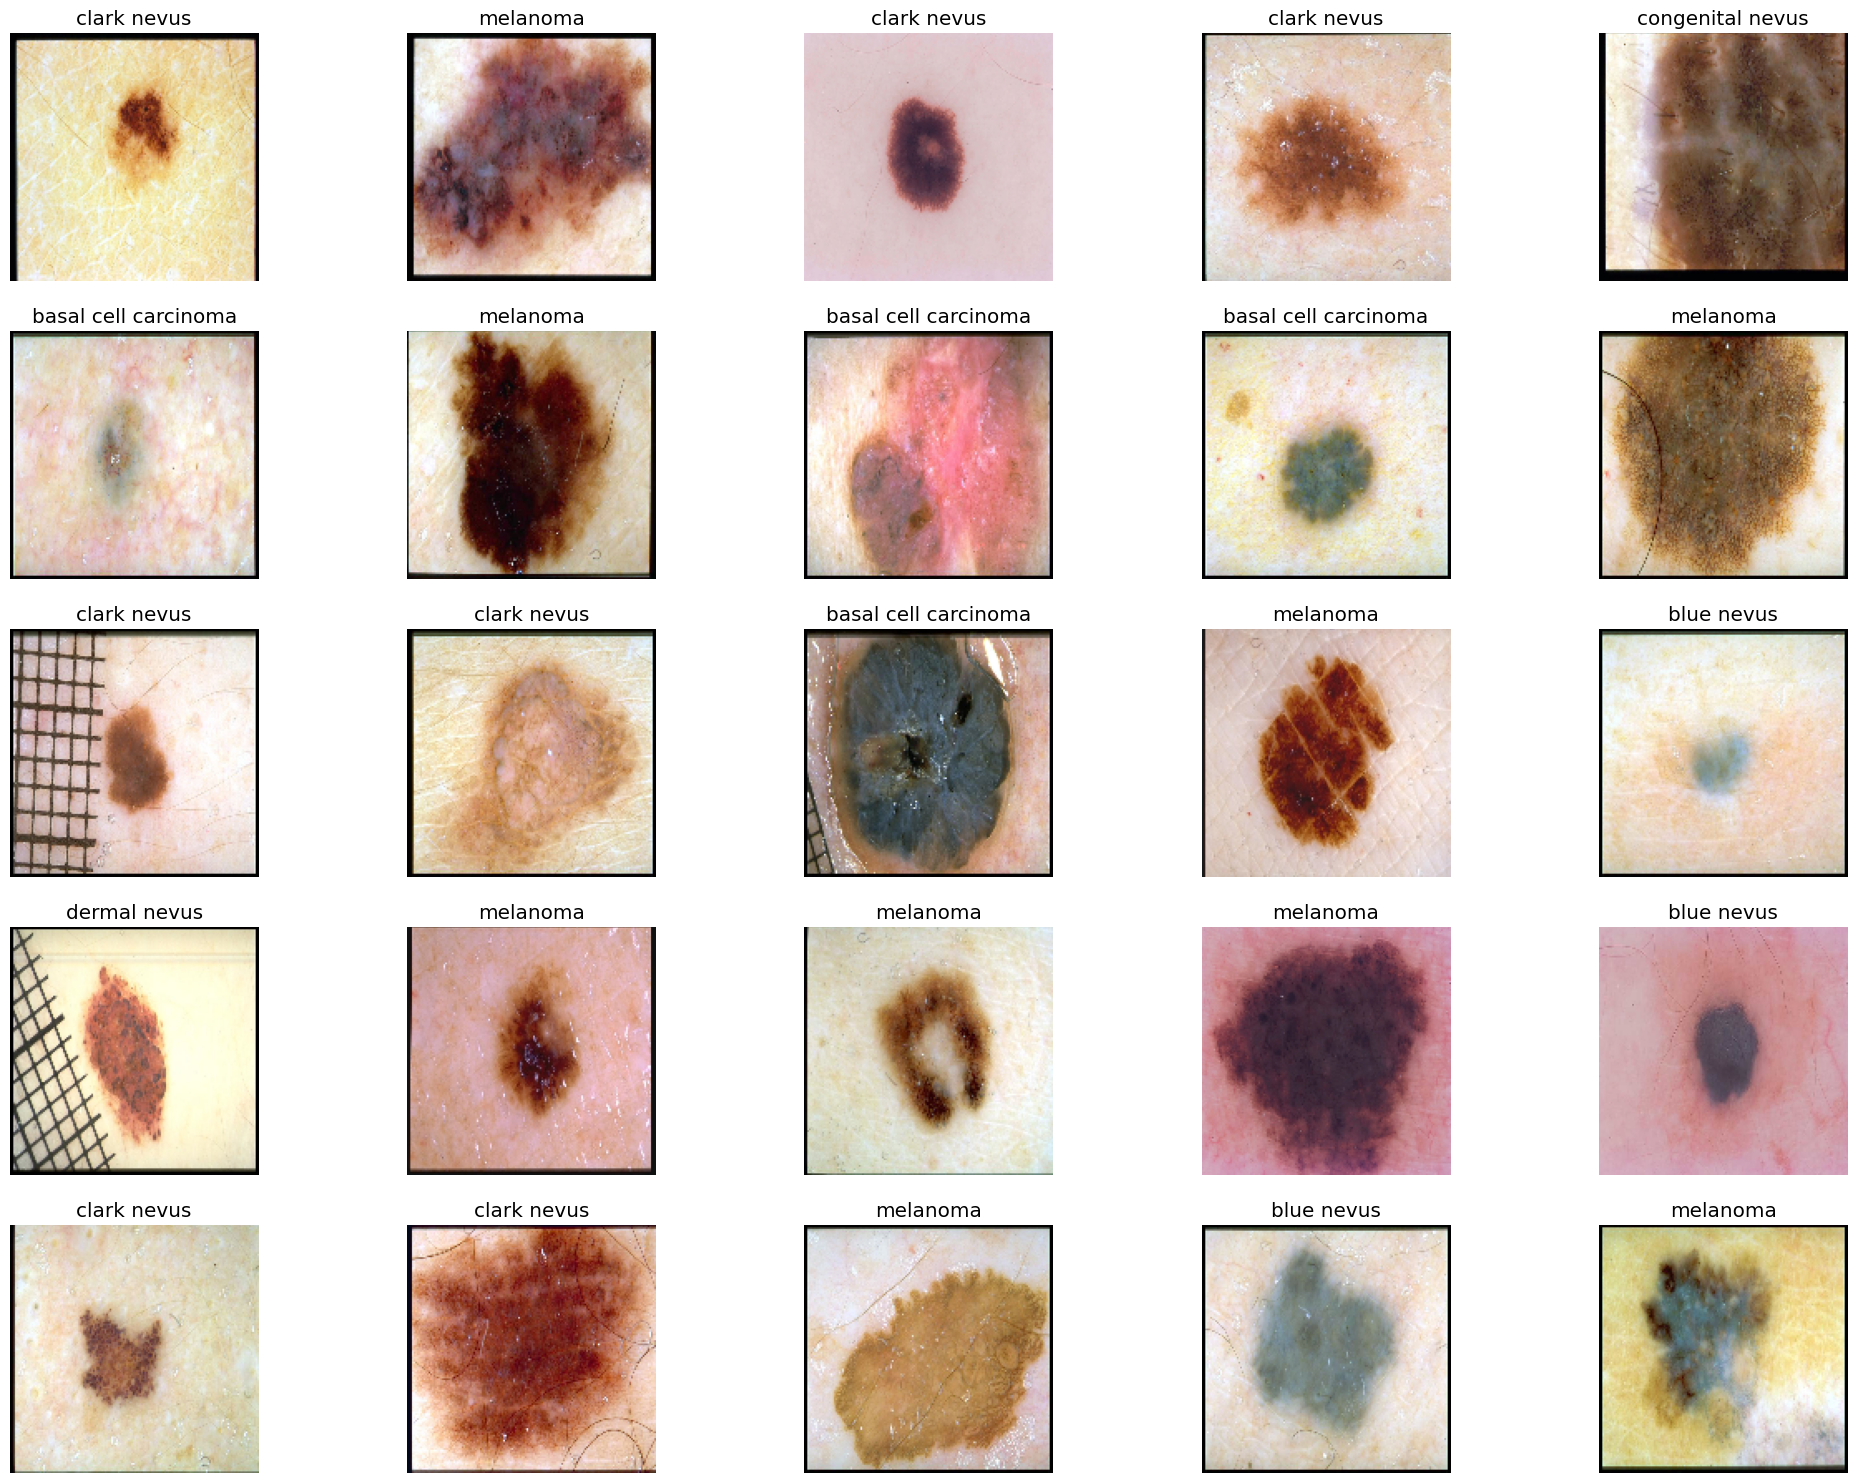

In [96]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3) # adjust the spaces between images
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(train_x))
        ax[i,j].imshow(train_x[rnd_number][:,:,::-1])
        ax[i,j].set_title(idx_to_class[train_y[rnd_number]][0] if isinstance(idx_to_class[train_y[rnd_number]], list) else idx_to_class[train_y[rnd_number]])
        ax[i,j].axis('off')

In [99]:
model = Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(15,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 200)     5600      
                                                                 
 conv2d_13 (Conv2D)          (None, 146, 146, 180)     324180    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 29, 29, 180)      0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 27, 27, 180)       291780    
                                                                 
 conv2d_15 (Conv2D)          (None, 25, 25, 140)       226940    
                                                                 
 conv2d_16 (Conv2D)          (None, 23, 23, 100)       126100    
                                                      

In [103]:
gpus = tf.config.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [104]:
tf.config.set_visible_devices(gpus[0], 'GPU')


In [107]:
tf.debugging.set_log_device_placement(True)

# Create some tensors
# with  tf.device('/GPU:0'):
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)

print(c)

tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [134]:
with  tf.device('/CPU:0'):
    trained = model.fit(train_x,train_y,epochs=15,validation_data=(valid_x, valid_y), verbose=True)

Epoch 1/15
13/13 [==============================] - 174s 13s/step - loss: 2.1243 - accuracy: 0.3705 - val_loss: 1.9535 - val_accuracy: 0.3842
Epoch 2/15
13/13 [==============================] - 156s 12s/step - loss: 2.1571 - accuracy: 0.3559 - val_loss: 1.9657 - val_accuracy: 0.3990
Epoch 3/15
13/13 [==============================] - 152s 12s/step - loss: 2.0783 - accuracy: 0.3801 - val_loss: 1.9816 - val_accuracy: 0.3990
Epoch 4/15
13/13 [==============================] - 157s 12s/step - loss: 2.0921 - accuracy: 0.3656 - val_loss: 1.9259 - val_accuracy: 0.4089
Epoch 5/15
13/13 [==============================] - 154s 12s/step - loss: 2.0849 - accuracy: 0.3826 - val_loss: 1.9127 - val_accuracy: 0.4089
Epoch 6/15
13/13 [==============================] - 151s 12s/step - loss: 2.0144 - accuracy: 0.3995 - val_loss: 1.8973 - val_accuracy: 0.4335
Epoch 7/15
13/13 [==============================] - 149s 12s/step - loss: 2.0637 - accuracy: 0.3826 - val_loss: 1.9080 - val_accuracy: 0.4433
Epoch 

In [135]:
model.save('huehuehue.h5')

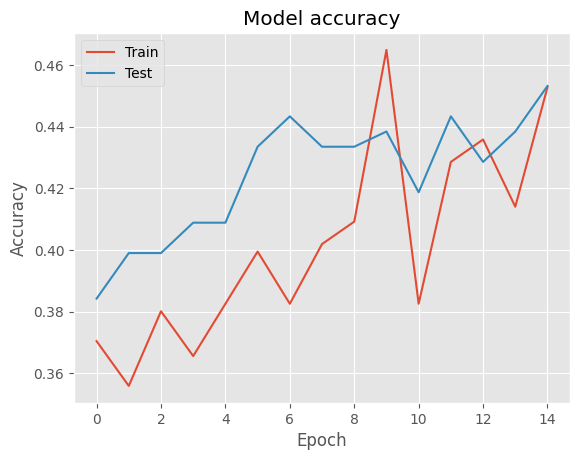

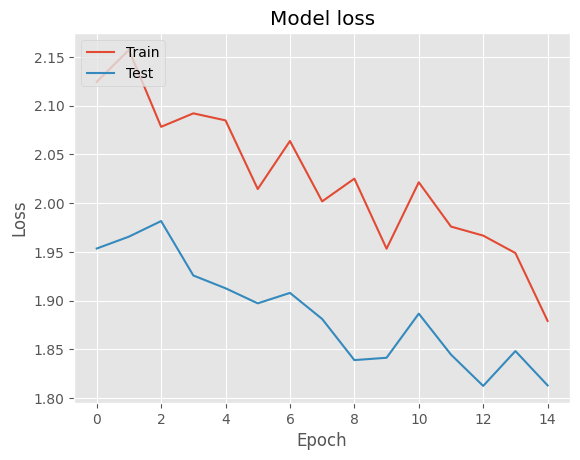

In [136]:
# Plotting accuracy values of the train and validation sets
plot.plot(trained.history['accuracy'])
plot.plot(trained.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

# Plotting loss values of the train and validation sets
plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [137]:
# Evaluation of the test set
model.evaluate(test_x,test_y, verbose=1)

13/13 [==============================] - 2s 98ms/step - loss: 1.7608 - accuracy: 0.4937


[1.7608027458190918, 0.49367088079452515]

In [138]:
import matplotlib.pyplot as plt
# Note: This code snippet for confusion-matrix is taken directly from the SKLEARN website.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=30)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual class')
    plt.xlabel('Predicted class')

13/13 [==============================] - 1s 121ms/step


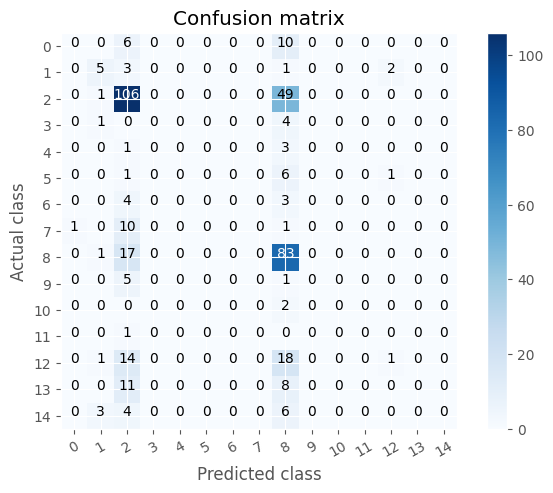

In [139]:
import sklearn.metrics as metrics
from collections import Counter
import itertools

Y_pred = model.predict(test_x)
Y_pred_classes = np.argmax(Y_pred, axis = 1) 

confusion_matrix = metrics.confusion_matrix(y_true=test_y, y_pred=Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_matrix, classes = range(15))

1/1 [==============================] - 0s 22ms/step


C:\Users\abhay\AppData\Local\Temp\ipykernel_30312\838421153.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


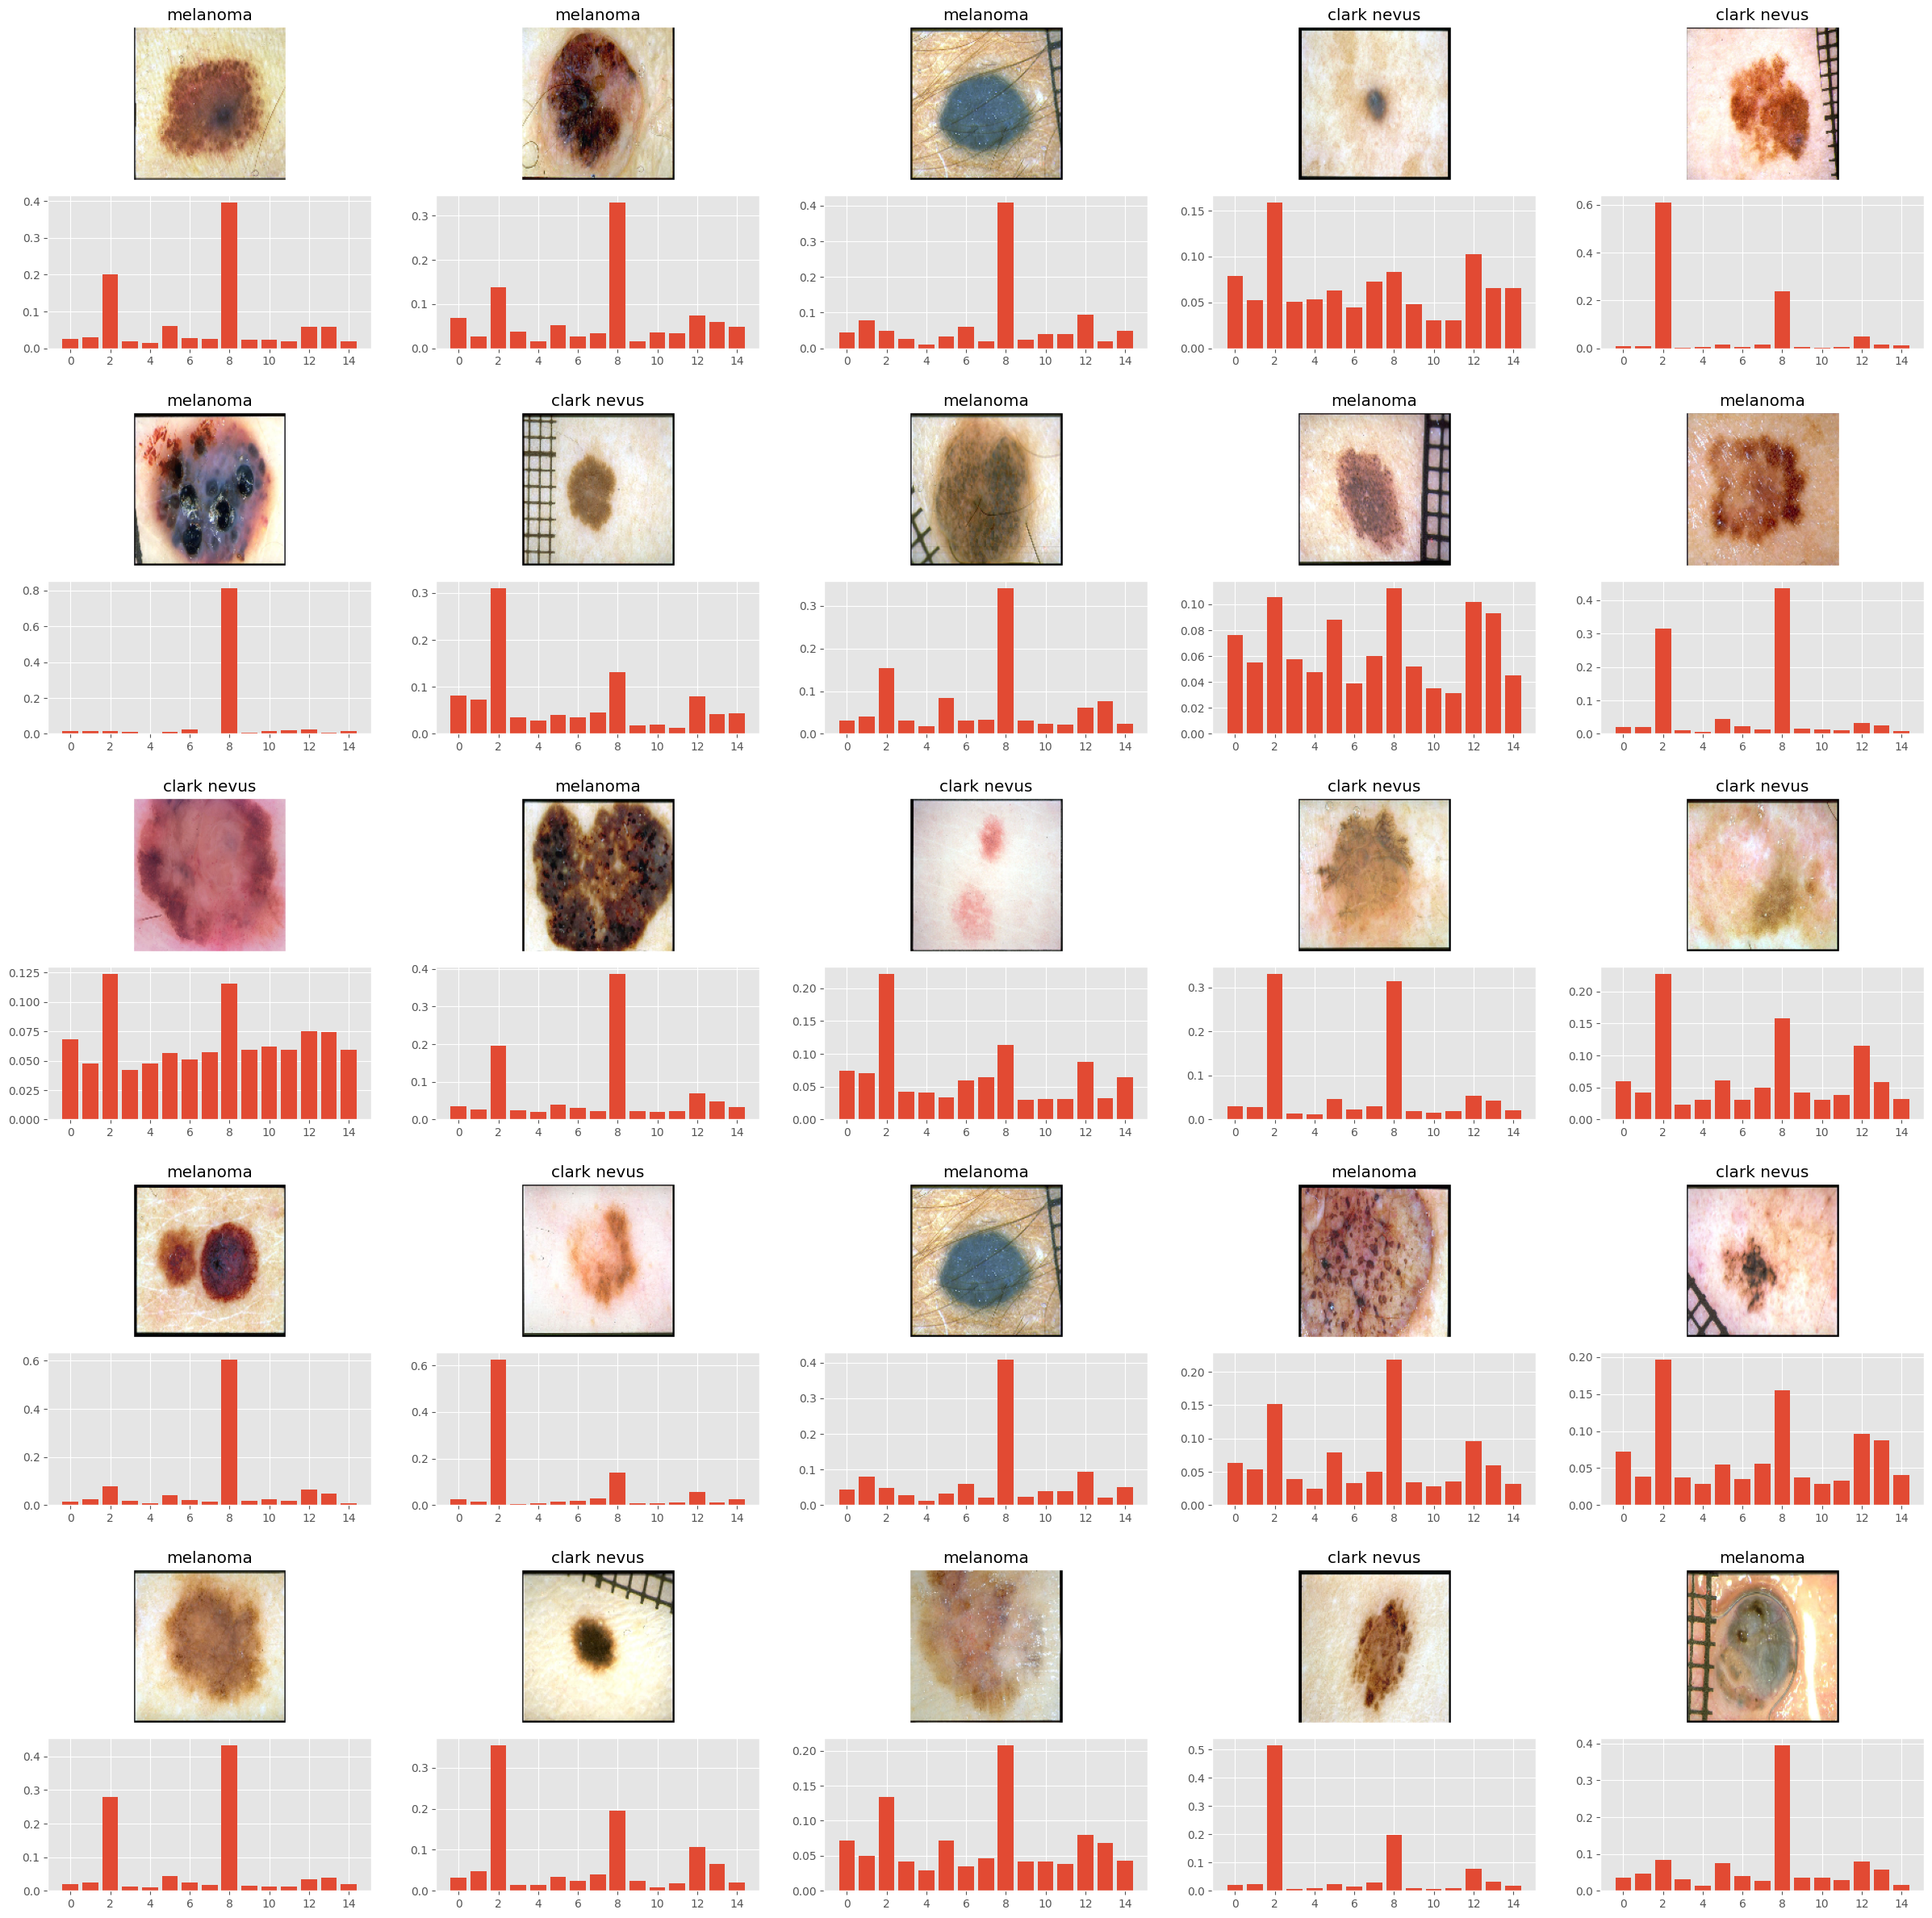

In [140]:
real = []
# Plotting some images and their predicted values.
fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(test_x))
    pred_image = np.array([test_x[rnd_number]])
    real.append(test_y[rnd_number])
    # print(np.argmax(model.predict(pred_image), axis = 1)[0])
    pred_class = idx_to_class[np.argmax(model.predict(pred_image), axis = 1)[0]][0] if isinstance(idx_to_class[np.argmax(model.predict(pred_image), axis = 1)[0]], list) else idx_to_class[np.argmax(model.predict(pred_image), axis = 1)[0]]
    pred_prob = model.predict(pred_image).reshape(15)
    for j in range(2):
        # It creates grid and set the image on the grid
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(pred_image[0][:,:,::-1])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        # It shows the pred_prob's values on the bar plot below the related image    
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],pred_prob)
            fig.add_subplot(ax)


fig.show()

In [141]:
real

[3, 5, 1, 1, 8, 14, 2, 5, 2, 8, 8, 13, 7, 2, 8, 2, 2, 1, 5, 8, 2, 2, 8, 2, 0]

second model